In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [4]:
"""
Following .csv contains data from the 2015 American Community Survey. The full columns are 
1.  ID-Identification
2.  ST-Statecode 
3.  PUMA-Public use microdata area code 
4.  JWMNP-Travel time to wrok 
5.  SCHL-Educational attainment
6.  WAGP-Wages
7.  WKHP-Usual hours worked per week past 12 months
8.  WKW -Weeks worked during past 12 months
9.  ESR-Employement status recode
10. FOD1P-Recoded field of degree  
11. NAICSP-Naics industry recode for 2013
12. JWAP-Time of arrival at work-hr&min 
13. JWDP-Time of departure at work-hr&min 
14. SOCP-SOC occupation code  
15. POWPUMA-Place of work
16. POWSP-Place of work –state of foreign country recode
17. NWAB-Temporary absence from work 
18. NWAV-Available for work 
19. NWLA-On layoff from work 
20. NWLK-Looking for work
21. AGEP-Age

"""
df=pd.read_csv('Texas Employment ACS 2015_Texas.csv',header=0)
print(df.shape)
print(df.size)
df.head()

(259224, 21)
5443704


,ID,ST,PUMA,JWMNP,SCHL,WAGP,WKHP,WKW,ESR,FOD1P,...,JWAP,JWDP,SOCP,POWPUMA,POWSP,NWAB,NWAV,NWLA,NWLK,AGEP
0,1,48,1907,40.0,22.0,35000.0,50.0,1.0,1.0,6199.0,...,90.0,43.0,339030,1900.0,48.0,3.0,5.0,3.0,3.0,61
1,2,48,1907,NaN,9.0,0.0,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,67
2,3,48,1907,NaN,6.0,0.0,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,80
3,4,48,5202,NaN,19.0,70000.0,40.0,1.0,1.0,NaN,...,NaN,NaN,119XXX,5200.0,48.0,3.0,5.0,3.0,3.0,33
4,5,48,5202,60.0,17.0,65000.0,55.0,1.0,1.0,NaN,...,64.0,16.0,533030,5300.0,48.0,3.0,5.0,3.0,3.0,39


In [14]:
# -------------------------------------------------   EDA   --------------------------------------------------------------------

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259224 entries, 0 to 259223
Data columns (total 21 columns):
ID         259224 non-null int64
ST         259224 non-null int64
PUMA       259224 non-null int64
JWMNP      109500 non-null float64
SCHL       250232 non-null float64
WAGP       208917 non-null float64
WKHP       129932 non-null float64
WKW        129932 non-null float64
ESR        205266 non-null float64
FOD1P      53917 non-null float64
NAICSP     148349 non-null object
JWAP       109500 non-null float64
JWDP       109500 non-null float64
SOCP       148349 non-null object
POWPUMA    114898 non-null float64
POWSP      114898 non-null float64
NWAB       205266 non-null float64
NWAV       205266 non-null float64
NWLA       205266 non-null float64
NWLK       205266 non-null float64
AGEP       259224 non-null int64
dtypes: float64(15), int64(4), object(2)
memory usage: 41.5+ MB


In [17]:
print(df.describe())

                  ID        ST           PUMA          JWMNP           SCHL  \
count  259224.000000  259224.0  259224.000000  109500.000000  250232.000000   
mean   129612.500000      48.0    3680.988975      26.227854      15.345056   
std     74831.667428       0.0    1781.547603      22.971057       5.933604   
min         1.000000      48.0     100.000000       1.000000       1.000000   
25%     64806.750000      48.0    2309.000000      10.000000      12.000000   
50%    129612.500000      48.0    3700.000000      20.000000      16.000000   
75%    194418.250000      48.0    5100.000000      30.000000      20.000000   
max    259224.000000      48.0    6900.000000     159.000000      24.000000   

                WAGP           WKHP            WKW            ESR  \
count  208917.000000  129932.000000  129932.000000  205266.000000   
mean    28058.387857      39.670474       1.839023       3.080929   
std     52571.880706      13.257255       1.599018       2.413022   
min         

1752554


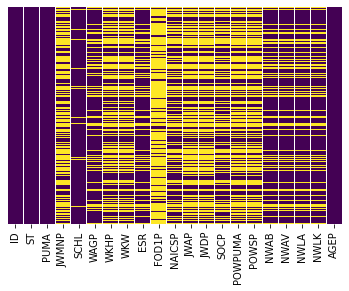

In [6]:
# Checking Null Values and Total sum of null values
import seaborn as sns
import matplotlib.pyplot as plt
print(sum(df.isnull().sum()))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

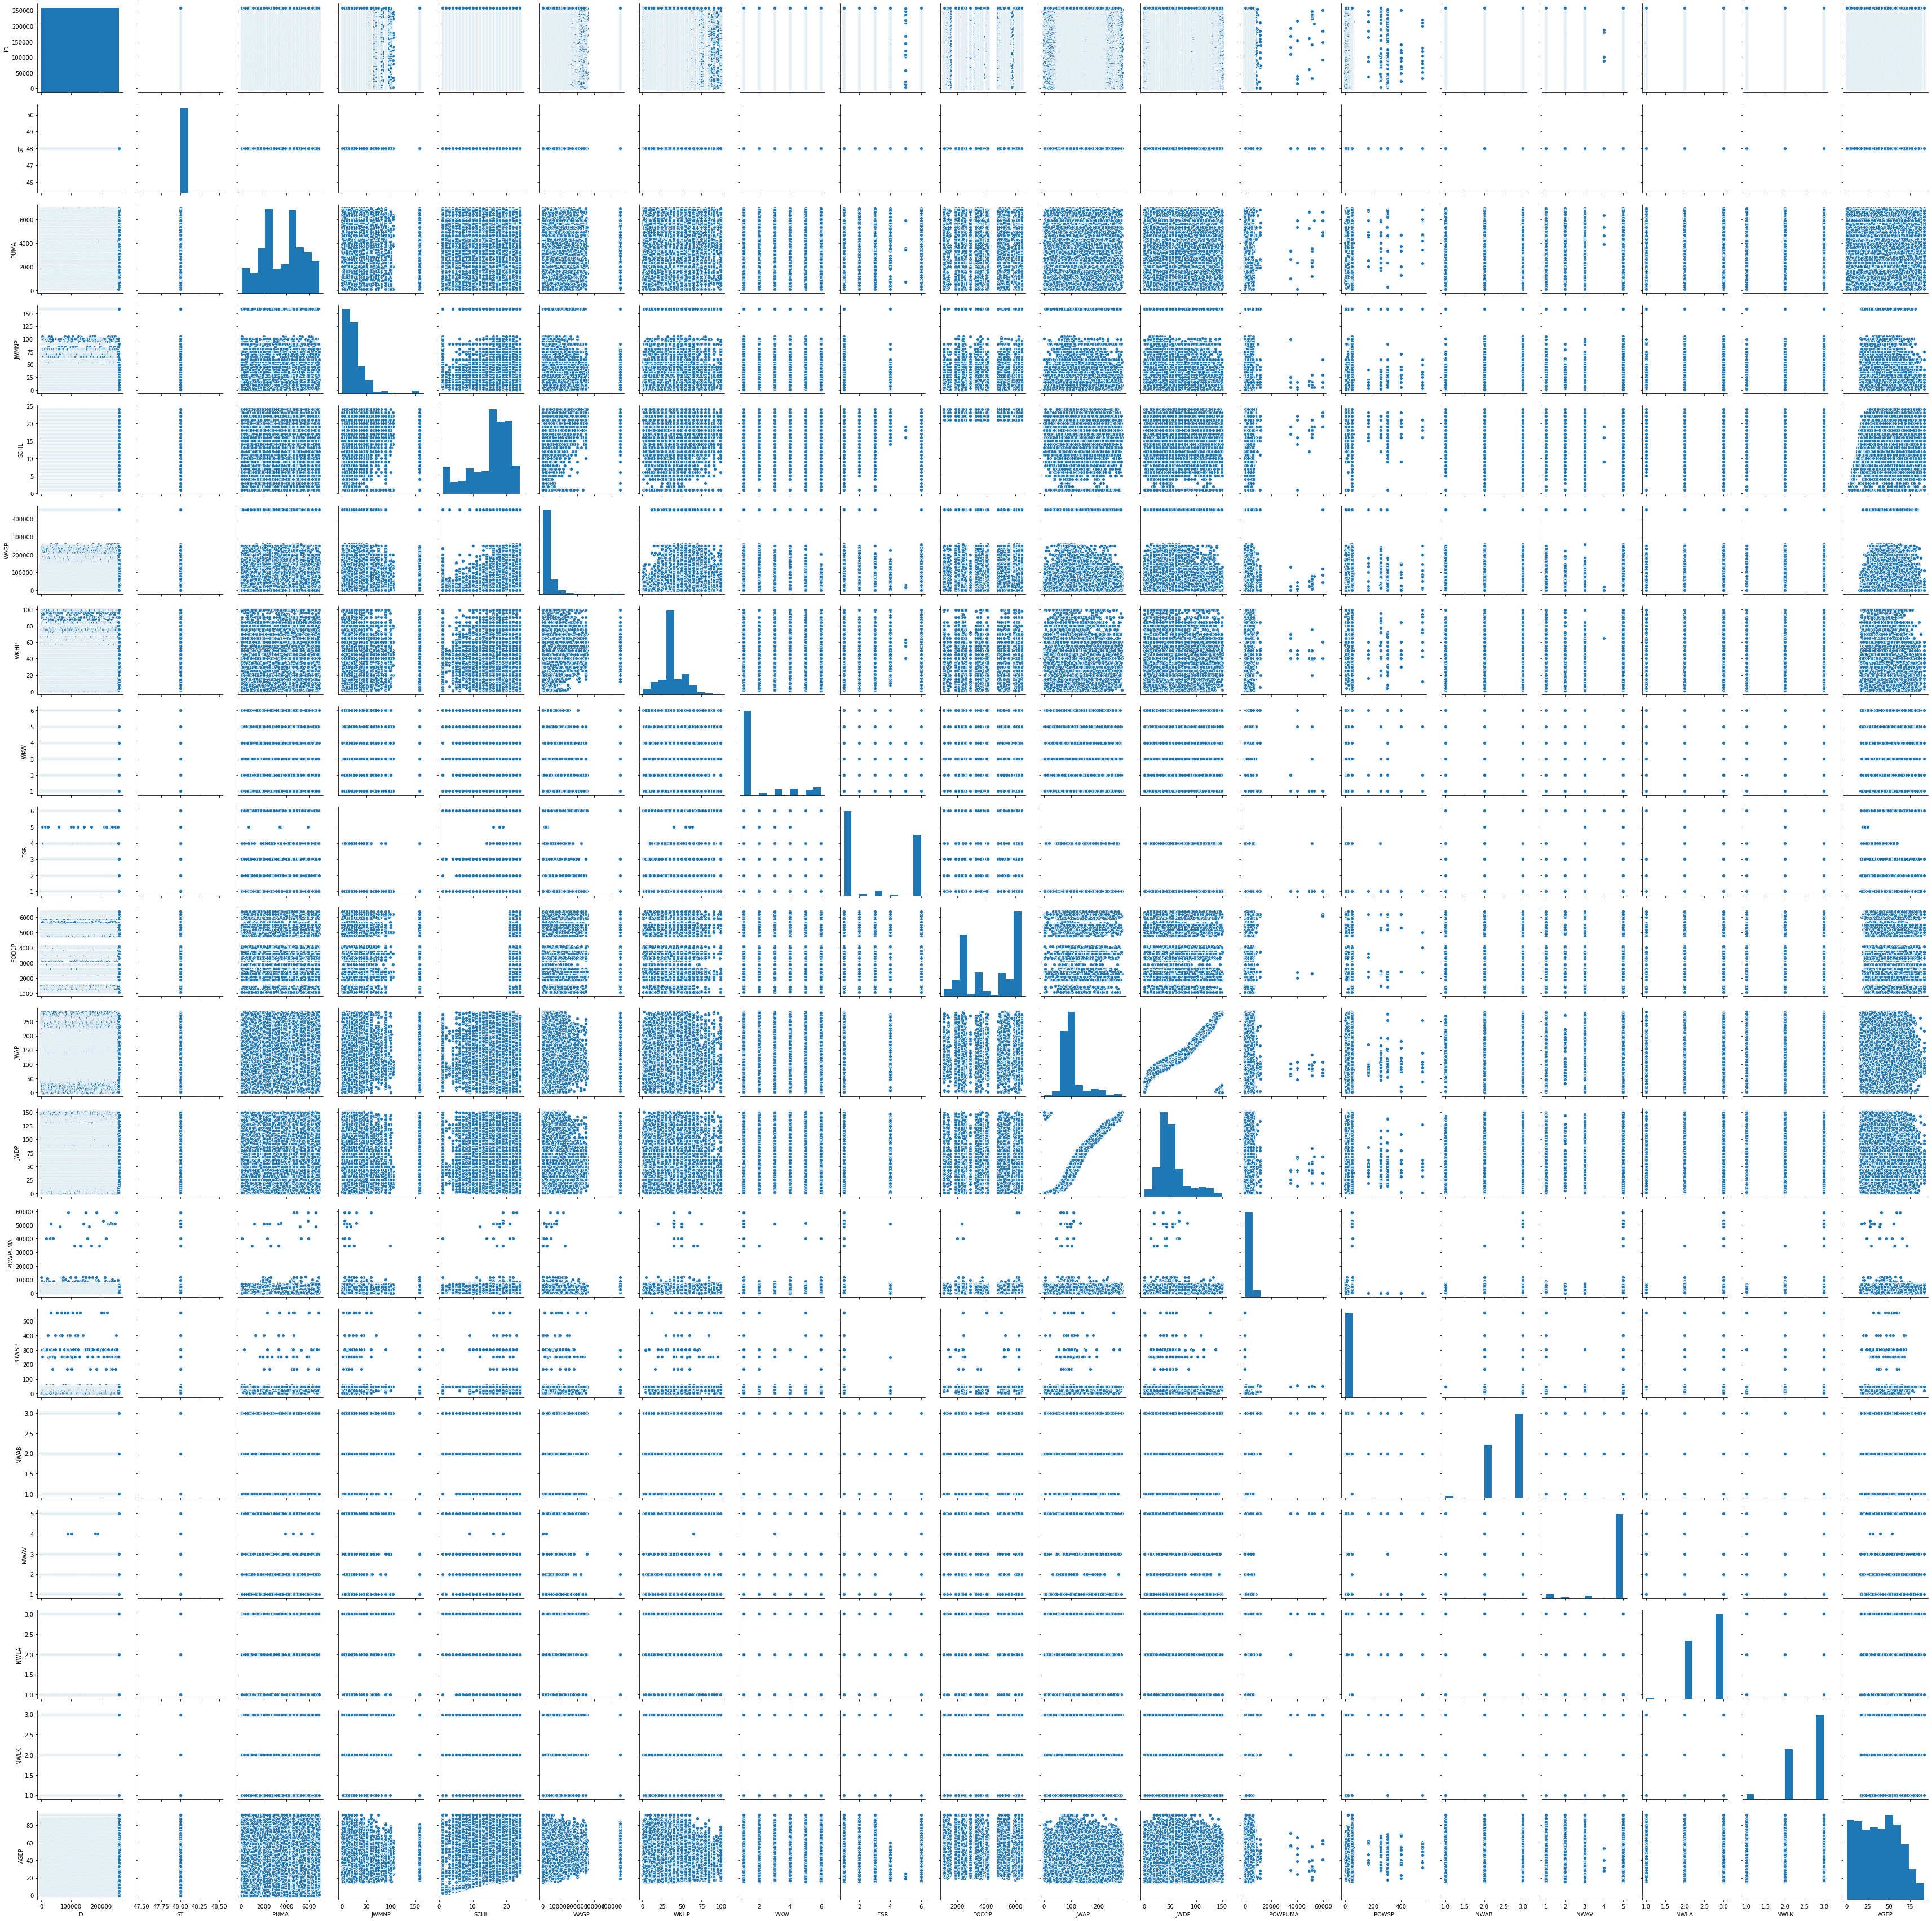

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,ID,ST,PUMA,JWMNP,SCHL,WAGP,WKHP,WKW,ESR,FOD1P,JWAP,JWDP,POWPUMA,POWSP,NWAB,NWAV,NWLA,NWLK,AGEP
ID,1.000000,NaN,-0.002662,0.004466,0.005349,0.000759,-0.001725,-0.001408,0.004978,-0.000975,-0.000186,0.000892,-0.001054,-0.004750,-0.003029,0.000573,-0.003973,-0.003329,0.002673
ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUMA,-0.002662,NaN,1.000000,0.011758,-0.026282,-0.007568,-0.008322,0.006127,0.010456,-0.003634,-0.000780,-0.000715,0.910292,0.025009,-0.013023,-0.003700,-0.015327,-0.015746,-0.020588
JWMNP,0.004466,NaN,0.011758,1.000000,0.010822,0.082122,0.104955,-0.033029,-0.029503,0.031316,-0.002152,-0.129884,0.010646,0.000503,-0.021472,-0.013095,-0.024144,-0.022526,0.042322
SCHL,0.005349,NaN,-0.026282,0.010822,1.000000,0.276836,0.088320,-0.083712,-0.207906,-0.022606,-0.016612,0.001698,-0.010065,0.003491,0.125081,0.014312,0.129191,0.121662,0.484579
WAGP,0.000759,NaN,-0.007568,0.082122,0.276836,1.000000,0.332723,-0.276812,-0.431821,0.031076,-0.096759,-0.108516,-0.002099,0.009237,0.319617,0.084241,0.327374,0.315998,-0.014786
WKHP,-0.001725,NaN,-0.008322,0.104955,0.088320,0.332723,1.000000,-0.383092,-0.199118,-0.001582,-0.177104,-0.208926,-0.015901,0.011350,0.141887,0.057984,0.129352,0.135610,0.080749
WKW,-0.001408,NaN,0.006127,-0.033029,-0.083712,-0.276812,-0.383092,1.000000,0.551235,-0.036507,0.127015,0.137724,0.003978,-0.003533,-0.319952,-0.227109,-0.352745,-0.370558,-0.163803
ESR,0.004978,NaN,0.010456,-0.029503,-0.207906,-0.431821,-0.199118,0.551235,1.000000,-0.053082,-0.035001,-0.040113,0.013681,-0.001517,-0.676256,-0.081725,-0.701017,-0.640643,0.275429
FOD1P,-0.000975,NaN,-0.003634,0.031316,-0.022606,0.031076,-0.001582,-0.036507,-0.053082,1.000000,0.046719,0.042036,-0.000848,-0.010085,0.042352,0.002058,0.042381,0.031810,-0.060922


In [ ]:
# --------------------------------------------- Preparation -------------------------------------------------------------------

In [5]:
# Null Values in AGEP Column
df['AGEP'].isnull().sum()

0

In [6]:
# For counting number of Rows where age is less than 18
count=0
for i in range(len(df['AGEP'])):
    if df['AGEP'][i]<18:
        count=count+1
print(count)

61123


In [7]:
# Keeping rows where age is above 18 
df_1=df[df['AGEP']>18]

In [8]:
df_1

,ID,ST,PUMA,JWMNP,SCHL,WAGP,WKHP,WKW,ESR,FOD1P,...,JWAP,JWDP,SOCP,POWPUMA,POWSP,NWAB,NWAV,NWLA,NWLK,AGEP
0,1,48,1907,40.0,22.0,35000.0,50.0,1.0,1.0,6199.0,...,90.0,43.0,339030,1900.0,48.0,3.0,5.0,3.0,3.0,61
1,2,48,1907,NaN,9.0,0.0,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,67
2,3,48,1907,NaN,6.0,0.0,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,80
3,4,48,5202,NaN,19.0,70000.0,40.0,1.0,1.0,NaN,...,NaN,NaN,119XXX,5200.0,48.0,3.0,5.0,3.0,3.0,33
4,5,48,5202,60.0,17.0,65000.0,55.0,1.0,1.0,NaN,...,64.0,16.0,533030,5300.0,48.0,3.0,5.0,3.0,3.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259217,259218,48,2310,15.0,21.0,24000.0,50.0,1.0,1.0,5200.0,...,97.0,55.0,212011,2300.0,48.0,3.0,5.0,3.0,3.0,45
259218,259219,48,600,NaN,16.0,0.0,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,49
259219,259220,48,1502,20.0,20.0,38000.0,40.0,3.0,1.0,NaN,...,86.0,43.0,512090,1500.0,48.0,3.0,5.0,3.0,3.0,36
259221,259222,48,400,1.0,21.0,35000.0,45.0,1.0,1.0,2300.0,...,86.0,47.0,411011,400.0,48.0,2.0,5.0,2.0,3.0,38


In [9]:
# Total null values after removing rows with age less than 18
sum(df_1.isnull().sum())

803614

In [10]:
# Imputing JWNMP N/A with 0 as it indicates not a worker or worker who worked at home.
df_1['JWMNP'].fillna(0,inplace=True)
df_1.JWMNP.isnull().sum()
#WKHP - Usual hours worked per week past 12 months
#N/A (less than 16 years old/did not work during the past 12 months)
df_1['WKHP'].fillna(0,inplace=True)
df_1.WKHP.isnull().sum()
# WKW - Weeks worked during past 12 months
#N/A (less than 16 years old/did not work during the past 12 months)
df_1['WKW'].fillna(0,inplace=True)
df_1.WKW.isnull().sum()
# ESR -Employment status recode
# N/A (less than 16 years old) - imputing with 0 code to indicate the same
df_1['ESR'].fillna(0,inplace=True)
df_1.ESR.isnull().sum()
# FOD1P - Recoded field of degree - first entry
# N/A (less than bachelor's degree)
df_1['FOD1P'].fillna(1000,inplace=True)
df_1.FOD1P.isnull().sum()
# NAICSP - Industry recode for 2013 and later based on 2012 NAICS codes  
# N/A (less than 16 years old/NILF who last worked more than 5 years ago or never worked)
df_1['NAICSP'].fillna(100,inplace=True)
df_1.NAICSP.isnull().sum()
# JWAP - Time of arrival at work - hour and minute
#N/A (not a worker; worker who worked at home)
df_1['JWAP'].fillna(0,inplace=True)
df_1.JWAP.isnull().sum()
# JWDP - Time of departure for work - hour and minute
#N/A (not a worker; worker who worked at home)
df_1['JWDP'].fillna(0,inplace=True)
df_1.JWDP.isnull().sum()
# SOCP - SOC Occupation code for 2012 and later based on 2010 SOC codes 
#N/A (less than 16 years old/NILF who last worked more than 5 years ago or never worked)
df_1['SOCP'].fillna(0,inplace=True)
df_1.SOCP.isnull().sum()
# POWPUMA - Place of work PUMA based on 2010 Census definition
# N/A (not a worker) - assigning code 0 to indicate the same.
df_1['POWPUMA'].fillna(0,inplace=True)
df_1.POWPUMA.isnull().sum()
# POWSP - Place of work - State or foreign country recode  
# N/A (not a worker)
df_1['POWSP'].fillna(0,inplace=True)
df_1.POWSP.isnull().sum()
# NWAB , NWAV, NWLA, NWLK
#N/A (less than 16 years old/at work/on layoff) - imputing with code 0 to indicate the same.
df_1.fillna(0,inplace=True)
df_1.isnull().sum()

ID         0
ST         0
PUMA       0
JWMNP      0
SCHL       0
WAGP       0
WKHP       0
WKW        0
ESR        0
FOD1P      0
NAICSP     0
JWAP       0
JWDP       0
SOCP       0
POWPUMA    0
POWSP      0
NWAB       0
NWAV       0
NWLA       0
NWLK       0
AGEP       0
dtype: int64

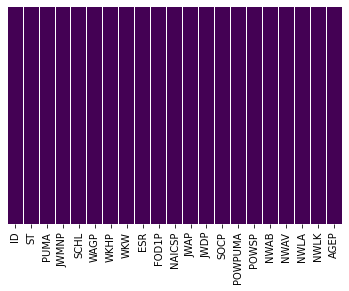

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
# Reducing the number of levels in the columns SCHL
"""
N/A (less than 3 years old)                               Value Counts -                   
     01 .No schooling completed                           16.0    42376
     02 .Nursery school, preschool                        21.0    35376
     03 .Kindergarten                                     19.0    32482
     04 .Grade 1                                          18.0    14985
     05 .Grade 2                                          22.0    13435
     06 .Grade 3                                          20.0    13055                  
     07 .Grade 4                                          17.0     9348
     08 .Grade 5                                          14.0     7741
     09 .Grade 6                                          12.0     7461
     10 .Grade 7                                          13.0     7199               
     11 .Grade 8                                          11.0     4078
     12 .Grade 9                                          1.0      3988
     13 .Grade 10                                         15.0     3876
     14 .Grade 11                                         9.0      3757
     15 .12th grade - no diploma                          23.0     3014                   
     16 .Regular high school diploma                      24.0     2092
     17 .GED or alternative credential                    10.0     1438        
     18 .Some college, but less than 1 year               6.0       942
     19 .1 or more years of college credit, no degree     8.0       931
     20 .Associate's degree                               7.0       609                        
     21 .Bachelor's degree                                5.0       455
     22 .Master's degree                                  4.0       190
     23 .Professional degree beyond a bachelor's degree   3.0        55
     24 .Doctorate degree                                 2.0        34

Result after grouping -
HighSchool         58154
No_Schooling       50500
Graduation         48404
School             18797
Post_Graduation    18540
Pre_School            88

"""
df_1['SCHL'] = ['Pre_School' if x == 2 or x==3 else 'School' if x>3 and x<14  else 'HighSchool' if x>13 and x<18  else 'Graduation' if x == 20 or x==21 else 'College' if x==18 and x==19  else 'Post_Graduation' if  x>21  else 'No_Schooling' for x in df_1['SCHL']]
df_1['SCHL'].value_counts()

HighSchool         58154
No_Schooling       50500
Graduation         48404
School             18797
Post_Graduation    18540
Pre_School            88
Name: SCHL, dtype: int64

In [13]:
# Reducing Number of different levels in FOD1P
"""
       Unique level in the column - 
       6199., 1000., 3401., 6207., 2406., 6002., 1105., 6203., 6205.,
       5200., 2399., 6200., 2300., 5501., 6107., 2408., 3600., 6106.,
       2312., 6201., 2901., 3700., 4101., 6206., 2304., 5007., 5507.,
       2405., 5301., 2400., 6109., 2102., 1303., 1501., 6004., 2503.,
       6211., 2100., 5506., 3301., 2106., 4001., 2602., 2306., 5403.,
       1401., 2417., 6402., 6000., 4801., 2414., 6209., 2311., 1103.,
       3609., 6212., 6104., 6108., 2313., 2500., 1100., 4002., 3601.,
       1904., 5002., 1902., 5500., 5004., 5003., 2419., 6105., 2301.,
       5203., 5098., 6102., 4000., 2403., 5299., 5901., 1104., 5504.,
       1102., 6299., 6001., 5005., 2601., 1901., 3201., 2502., 6103.,
       2107., 5008., 2412., 2308., 6204., 2309., 2305., 2001., 2599.,
       2401., 3611., 5404., 2504., 2404., 3501., 5601., 3603., 2499.,
       2314., 2310., 2418., 6210., 6110., 3604., 3701., 3608., 2413.,
       5202., 2407., 3606., 5701., 5502., 4901., 1302., 2411., 6007.,
       3702., 3602., 1199., 1903., 2303., 1301., 5401., 4007., 1101.,
       4006., 2307., 5402., 2603., 3202., 4005., 2201., 3302., 2105.,
       3607., 2402., 6403., 5503., 5001., 3402., 2101., 6100., 5505.,
       5201., 6003., 6005., 5205., 2416., 2501., 3699., 2409., 6006.,
       5206., 2415., 5102., 5006., 2410., 3605., 1106., 3801., 6202.,
       6099., 5000., 5599.
       
Result - 
Under_Grad       140567
Grad_Or_Above     53916
"""
df_1.FOD1P.unique()
df_1['FOD1P'] = ['Under_Grad' if x == 1000 else 'Grad_Or_Above' for x in df_1['FOD1P']]
df_1['FOD1P'].value_counts()

Under_Grad       140567
Grad_Or_Above     53916
Name: FOD1P, dtype: int64

In [14]:
# Reducing NAICSP column. Can be grouped according to type of industy 
"""
     Codes provied in documentation 
     111      .AGR-CROP PRODUCTION
     112      .AGR-ANIMAL PRODUCTION AND AQUACULTURE
     1133     .AGR-LOGGING
     113M     .AGR-FORESTRY EXCEPT LOGGING
     114      .AGR-FISHING, HUNTING, AND TRAPPING
     115      .AGR-SUPPORT ACTIVITIES FOR AGRICULTURE AND FORESTRY
     211      .EXT-OIL AND GAS EXTRACTION
     2121     .EXT-COAL MINING
     2122     .EXT-METAL ORE MINING
     2123     .EXT-NONMETALLIC MINERAL MINING AND QUARRYING
     213      .EXT-SUPPORT ACTIVITIES FOR MINING
     2211P    .UTL-ELECTRIC POWER GENERATION, TRANSMISSION AND
              .DISTRIBUTION
     2212P    .UTL-NATURAL GAS DISTRIBUTION
     22132    .UTL-SEWAGE TREATMENT FACILITIES
     2213M    .UTL-WATER, STEAM, AIR CONDITIONING, AND IRRIGATION
              .SYSTEMS
     221MP    .UTL-ELECTRIC AND GAS, AND OTHER COMBINATIONS
     22S      .UTL-NOT SPECIFIED UTILITIES
     23       .CON-CONSTRUCTION, INCL CLEANING DURING AND IMM AFTER
     3113     .MFG-SUGAR AND CONFECTIONERY PRODUCTS
     3114     .MFG-FRUIT AND VEGETABLE PRESERVING AND SPECIALTY FOODS
     3115     .MFG-DAIRY PRODUCTS
     3116     .MFG-ANIMAL SLAUGHTERING AND PROCESSING
     311811   .MFG-RETAIL BAKERIES
     3118Z    .MFG-BAKERIES AND TORTILLA, EXCEPT RETAIL BAKERIES
     311M1    .MFG-ANIMAL FOOD, GRAIN AND OILSEED MILLING
     311M2    .MFG-SEAFOOD AND OTHER MISCELLANEOUS FOODS, N.E.C.
     311S     .MFG-NOT SPECIFIED FOOD INDUSTRIES
     3121     .MFG-BEVERAGE
     3122     .MFG-TOBACCO
It is observed that the categories can be grouped as
Combining 31,32,33,3M since all belong to MFG
Combining 44,45,4M since all are RET
Combining 48,49 since they are all TRN
Combining 52,53 since they are all FIN
Combining 54,55,56 since they are all PRF
Combining 71,72 since they are all ENT

Result - After reducing codes -
0    54
1    10
2    10
3    42
4    54

"""
df_1['NAICSP'].value_counts()
df_1['NAICSP'] = df_1.NAICSP.astype(str).str[:2]
df_1['NAICSP'].value_counts()
df_1['NAICSP'] = df_1['NAICSP'].astype(str)
MFG = ['31','32','33','3M']
RET = ['44','45','4M']
TRN = [48,49]
FIN = [52,53]
PRF = [54,55,56]
ENT = [71,72]
"""
replace_NAISCP_dict = {'32':'31','33':'31','3M':'31','45':'44','4M':'44','49':'48','53':'52','55':'54','56':'54','72':'71'}
df_1['NAICSP'] = df_1['NAICSP'].replace(replace_NAISCP_dict)
"""
df_1['NAICSP']=['MFG' if x in MFG else 'RET' if x in RET else 'TRN' if x in TRN else 'FIN' if x in FIN else 'PRF' if x in PRF else 'ENT' if x in ENT else 'Not a Worker' for x in df_1['NAICSP']]
df_1['NAICSP'].value_counts()

Not a Worker    165726
RET              16077
MFG              12680
Name: NAICSP, dtype: int64

In [15]:
# Column JWAP has time frame of every 15 mins therefore contains large number
# of levels which is thus needed to be reduced. Range - 12:00 AM to 11:59 PM 12 hours
"""
Levels are Grouped as -               Codes
Work_from_home                        000
Quarter_1=12:00 AM to 06:00 AM        001 to 069
Quarter_2=06:00 AM to 12:00 AM        070 to 141 
Quarter_3=12:00 PM to 06:00 PM        142 to 213  
Quarter_4=06:00 PM to 11:59 PM        214 to 285      
  
"""
df_1['JWAP'] = ['Quarter_1' if x>=1 and x<=69 else 'Quarter_2' if x>=70 and x<=141 else 'Quarter_3' if x>=142 and x<=213 else 'Quarter_4' if x>=214 and x<=285 else 'Work_from_Home' for x in df_1['JWAP']]
df_1['JWAP'].value_counts()

Work_from_Home    87215
Quarter_2         84415
Quarter_1         10817
Quarter_3          8500
Quarter_4          3536
Name: JWAP, dtype: int64

In [16]:
# Column JWDP has time frame of every 15 mins therefore contains large number
# of levels which is thus needed to be reduced. Range - 12:00 AM to 11:59 PM 12 hours
"""
Levels are Grouped as -               Codes
Work_from_home                        000
Quarter_1=12:00 AM to 06:00 AM        001 to 030
Quarter_2=06:00 AM to 12:00 AM        031 to 090 
Quarter_3=12:00 PM to 06:00 PM        091 to 126  
Quarter_4=06:00 PM to 11:59 PM        127 to 150      
  
"""
df_1['JWDP'] = ['Quarter_1' if x>=1 and x<=30 else 'Quarter_2' if x>=31 and x<=90 else 'Quarter_3' if x>=91 and x<=126 else 'Quarter_4' if x>=127 and x<=150 else 'Work_from_Home' for x in df_1['JWDP']]
df_1['JWDP'].value_counts()

Work_from_Home    87215
Quarter_2         80487
Quarter_1         14984
Quarter_3          8596
Quarter_4          3201
Name: JWDP, dtype: int64

In [17]:
# Columnn POWPUMA can be grouped as Not a worker, Not work in USA or in Puerto Rico
# thus should be group by (Manufacturing, Finance etc.) i.e. similar occupation.
df_1['POWPUMA'] = ['Not Worker or Under16' if x == 0 else 'Not Work in USA or Puerto' if x == 1 else 'Assigned POW' for x in df_1['POWPUMA']]
df_1['POWPUMA'].value_counts()

Assigned POW                 112479
Not Worker or Under16         81867
Not Work in USA or Puerto       137
Name: POWPUMA, dtype: int64

In [19]:
# Columnn SOCP has large number of subcategory of category in Occupation. 
# thus should be group by (Manufacturing, Finance etc.) i.e. similar occupation.
"""
1110XX .MGR-CHIEF EXECUTIVES AND LEGISLATORS *
     111021 .MGR-GENERAL AND OPERATIONS MANAGERS
     112011 .MGR-ADVERTISING AND PROMOTIONS MANAGERS
     112020 .MGR-MARKETING AND SALES MANAGERS
     112031 .MGR-PUBLIC RELATIONS AND FUNDRAISING MANAGERS
     113011 .MGR-ADMINISTRATIVE SERVICES MANAGERS
     113021 .MGR-COMPUTER AND INFORMATION SYSTEMS MANAGERS
     113031 .MGR-FINANCIAL MANAGERS
     113111 .MGR-COMPENSATION AND BENEFITS MANAGERS
     113121 .MGR-HUMAN RESOURCES MANAGERS
     113131 .MGR-TRAINING AND DEVELOPMENT MANAGERS
     113051 .MGR-INDUSTRIAL PRODUCTION MANAGERS
     113061 .MGR-PURCHASING MANAGERS
     131041 .BUS-COMPLIANCE OFFICERS
     131051 .BUS-COST ESTIMATORS
     131070 .BUS-HUMAN RESOURCES WORKERS
     131081 .BUS-LOGISTICIANS
     131111 .BUS-MANAGEMENT ANALYSTS
     131121 .BUS-MEETING CONVENTION, AND EVENT PLANNERS
     131131 .BUS-FUNDRAISERS
     131141 .BUS-COMPENSATION, BENEFITS, AND JOB ANALYSIS SPECIALISTS
     131151 .BUS-TRAINING AND DEVELOPMENT SPECIALISTS
     131161 .BUS-MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS
     131199 .BUS-BUSINESS OPERATIONS SPECIALISTS, ALL OTHER
     132011 .FIN-ACCOUNTANTS AND AUDITORS
     132021 .FIN-APPRAISERS AND ASSESSORS OF REAL ESTATE
     132031 .FIN-BUDGET ANALYSTS
Reduced code - 
Not a Worker 0
Business and Finance 11 13 
Technical 25 15 17 19 
Entertainment 27 35 
Medical 29
General Services 21 31 33 37 39 41 43 45 47 49 51 53 
Military and Law Enforcement 23 55 99 
"""
df_1['SOCP'] = df_1.SOCP.astype(str).str[:2]
df_1['SOCP'].unique()
not_a_worker=['0']
businnes_and_finance=['11','13']
technical=['25','15','17','19']
entertainment=['27','35']
medical=['29']
general_services=['21','31','33','37','39','41','43','45','47','49','51','53']
militay_and_law_enforcement=['23','55','99']
df_1['SOCP']=['businnes_and_finance' if x in businnes_and_finance else 'Technical' if x in technical else 'Entertainment' if x in entertainment else 'Medical' if x in medical else 'General Services' if x in general_services else 'Militay and Law Enforcement' if x in militay_and_law_enforcement else 'Not a Worker' for x in df_1['SOCP']]
df_1['SOCP'].unique()

array(['General Services', 'Not a Worker', 'businnes_and_finance',
       'Medical', 'Technical', 'Entertainment',
       'Militay and Law Enforcement'], dtype=object)

In [21]:
df_1.to_csv('Proccessed_Texas_Employment_ACS_2015_Texas.csv')